In [4]:
import numpy as np
import scipy.stats as ss

In [2]:
norm_dist=ss.norm.rvs(size=20)
norm_dist

array([-1.5535461 ,  0.78292276, -0.28745274, -0.05938169, -0.26915179,
       -0.30916668,  0.21810435,  1.71820804, -0.35180801, -0.32854641,
       -1.14481695,  0.13520564, -1.15033088, -1.28624091,  1.23325319,
        1.29777839, -0.84335592,  0.62707439,  1.09671101, -0.34205843])

In [3]:
ss.normaltest(norm_dist)

NormaltestResult(statistic=0.89224101388397625, pvalue=0.64010663012112867)

### 卡方检验 
<img src='./image/4.7.png' width=400 height=300 div align=left />

In [5]:
ss.chi2_contingency([[15,95],[85,5]])

(126.08080808080808, 2.9521414005078985e-29, 1, array([[ 55.,  55.],
        [ 45.,  45.]]))

### 独立分布t检验
检验两组变量均值是否相同
<br /><img src='./image/4.7_2.png' width=400 height=300 div align=left />

In [6]:
ss.ttest_ind(ss.norm.rvs(size=10),ss.norm.rvs(size=20))

Ttest_indResult(statistic=0.66413706390052996, pvalue=0.51203499771552408)

### 方差检验
<img src='./image/4.7_3.png' width=400 height=300 div align=left />
<br />SSM组间均方差，SSE组内均方差  
<img src='./image/4.7_4.png' width=400 height=300 div align=left />

In [7]:
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])

F_onewayResult(statistic=17.619417475728156, pvalue=0.00026871530798216412)

### 检验是否符合某个分布 QQ图
将变量的分位数和分布的分位数相比较

In [2]:
from statsmodels.graphics.api import qqplot
from matplotlib import pyplot as plt

D:\anaconda\64bit\envs\py3.6\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


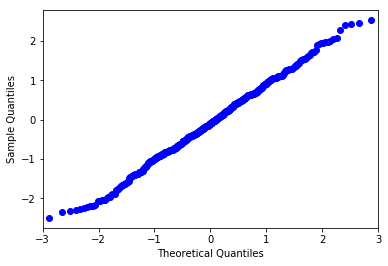

In [7]:
plt.show(qqplot(ss.norm.rvs(size=500)))

相关系数

In [10]:
import pandas as pd

In [11]:
s1=pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2=pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])

In [12]:
s1.corr(s2)  # 默认 皮尔逊相关系数

0.93337296004659231

In [13]:
s1.corr(s2,method='spearman')   # 斯皮尔曼相关系数

0.71428571428571441

In [14]:
df=pd.DataFrame([s1,s2])

In [16]:
df

,0,1,2,3,4,5,6
0,0.1,0.2,1.1,2.4,1.3,0.3,0.5
1,0.5,0.4,1.2,2.5,1.1,0.7,0.1


In [23]:
df=pd.DataFrame(np.array([s1,s2]).T)  # 将变量几列合成dataframe的方法！

In [24]:
df

,0,1
0,0.1,0.5
1,0.2,0.4
2,1.1,1.2
3,2.4,2.5
4,1.3,1.1
5,0.3,0.7
6,0.5,0.1


In [25]:
df.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


### 回归

In [26]:
x=np.arange(10).astype(np.float).reshape((10,1))

In [27]:
x

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.]])

In [28]:
y=x*3 + 4 + np.random.random((10,1))

In [29]:
y

array([[  4.88892081],
       [  7.5361464 ],
       [ 10.62449725],
       [ 13.32285175],
       [ 16.82485072],
       [ 19.84570337],
       [ 22.47774843],
       [ 25.32149196],
       [ 28.98824439],
       [ 31.65537525]])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg=LinearRegression()

In [32]:
reg=reg.fit(x,y)

In [33]:
y_pred=reg.predict(x)
y_pred

array([[  4.64767507],
       [  7.64787684],
       [ 10.64807861],
       [ 13.64828038],
       [ 16.64848215],
       [ 19.64868392],
       [ 22.64888569],
       [ 25.64908746],
       [ 28.64928923],
       [ 31.649491  ]])

In [34]:
reg.coef_

array([[ 3.00020177]])

In [35]:
reg.intercept_

array([ 4.64767507])

### 主成分分析，PCA变换
<img src='./image/4.7_5.png' width=600 height=900 div align=left />

In [36]:
data=np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),
               np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T

In [37]:
data

array([[ 2.5,  2.4],
       [ 0.5,  0.7],
       [ 2.2,  2.9],
       [ 1.9,  2.2],
       [ 3.1,  3. ],
       [ 2.3,  2.7],
       [ 2. ,  1.6],
       [ 1. ,  1.1],
       [ 1.5,  1.6],
       [ 1.1,  0.9]])

In [38]:
from sklearn.decomposition import PCA

In [39]:
# 降成1维
lower_dim=PCA(n_components=1)

In [40]:
lower_dim.fit(data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
lower_dim.explained_variance_ratio_  # 降维后得到96%的信息量

array([ 0.96318131])

In [42]:
lower_dim.fit_transform(data)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

自己动手写PCA方法

In [43]:
from scipy import linalg
def myPCA(data,n_components=100000):
    mean_values=np.mean(data,axis=0)
    mid=data-mean_values
    cov_mat=np.cov(mid,rowvar=False)
    eig_vals,eig_vects=linalg.eig(np.mat(cov_mat))
    eig_val_index=np.argsort(eig_vals)   # sort得到的是排序值列，argsort得到值排序后的索引列
    eig_val_index=eig_val_index[:-(n_components+1):-1]
    eig_vects=eig_vects[:,eig_val_index]
    low_dim_mat=np.dot(mid,eig_vects)
    return low_dim_mat,eig_vals

In [44]:
data=np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),
               np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T

In [45]:
print(myPCA(data,n_components=1))

(array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]]), array([ 0.04908340+0.j,  1.28402771+0.j]))


## 交叉分析方法与实现
<img src='./image/4.8.png' width=400 div align=left />

In [46]:
import seaborn as sns

In [47]:
df=pd.read_csv('./data/HR.csv')

In [48]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low
14999,NaN,0.52,2,158,3,0,1,0,support,low
15000,NaN,999999.00,2,158,3,0,1,0,sale,low
15001,0.70,0.40,2,158,2,0,1,0,sale,nme


In [50]:
df['department'].value_counts()

sales          4140
technical      2720
support        2230
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
sale              2
Name: department, dtype: int64

In [51]:
df['salary'].value_counts()

low       7318
medium    6446
high      1237
nme          1
Name: salary, dtype: int64

In [53]:
df=df[df['last_evaluation']<=1][df['salary']!='nme'][df['department']!='sale']

D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


探讨各个部门的离职率是否有差异

In [54]:
dp_indices=df.groupby(by='department').indices
dp_indices

{'IT': array([   61,    62,    63, ..., 14932, 14933, 14938], dtype=int64),
 'RandD': array([  301,   302,   303,   304,   305,   453,   454,   455,   456,
          457,   605,   606,   607,   608,   609,   833,   834,   835,
          836,   837,   985,   986,   987,   988,   989,  1061,  1062,
         1063,  1064,  1065,  1217,  1218,  1219,  1291,  1292,  1293,
         1294,  1295,  1296,  1368,  1369,  1370,  1371,  1372,  1373,
         1445,  1446,  1447,  1448,  1449,  1450,  1522,  1523,  1524,
         1525,  1526,  1598,  1599,  1600,  1601,  1602,  1675,  1676,
         1677,  1678,  1679,  1751,  1752,  1753,  1754,  1755,  1827,
         1828,  1829,  1830,  1831,  1903,  1904,  1905,  1906,  1907,
         1979,  1980,  1981,  1982,  1983,  2055,  2056,  2057,  2058,
         2059,  2131,  2132,  2133,  2134,  2135,  2207,  2208,  2209,
         2210,  2211,  2283,  2284,  2285,  2286,  2287,  2359,  2360,
         2361,  2362,  2363,  2435,  2436,  2437,  2438,  2439,

取出department里面sales、technical类别的left值,对比是否有差异

In [55]:
sales_values=df['left'].iloc[dp_indices['sales']].values
technical_values=df['left'].iloc[dp_indices['technical']].values

In [56]:
print(ss.ttest_ind(sales_values,technical_values))

Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.28910690461744781)


每个类别两两比较其left是否有差异

In [58]:
dp_keys=list(dp_indices.keys())
dp_keys

['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

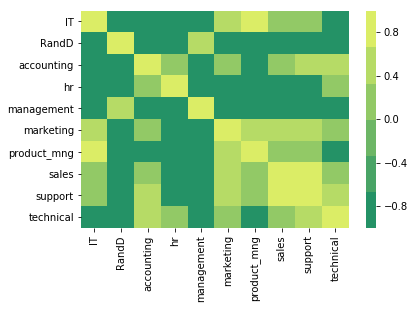

In [68]:
dp_t_mat=np.zeros([len(dp_keys),len(dp_keys)])
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value=ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values,
                             df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value<0.05:
            dp_t_mat[i][j]=-1
        else:
            dp_t_mat[i][j]=p_value
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys,cmap=sns.color_palette('summer'))
plt.show()

深色部分是left离职率有着显著差异的部门

#### 透视表方法

In [63]:
piv_tab=pd.pivot_table(df,values='left',index=['promotion_last_5years','salary'],
                        columns=['Work_accident'],aggfunc=np.mean)
print(piv_tab)

Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331835  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256


发现过去5年没有晋升，工资低且没有工作事故的，离职率最高，达到33.18%。

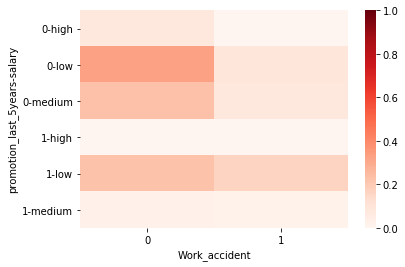

In [71]:
sns.set_context(font_scale=2.5)
sns.heatmap(piv_tab,vmax=1,vmin=0,cmap=sns.color_palette('Reds',n_colors=256))
plt.show()

## 分组分析方法与实现
钻取：改变维的层次，变换分析的粒度
分组遇到连续分组时，方法包括：分隔（一阶差分）、拐点（二阶差分）、聚类、不纯度（Gini）
seaborn里面的barplot可以实现分组分析

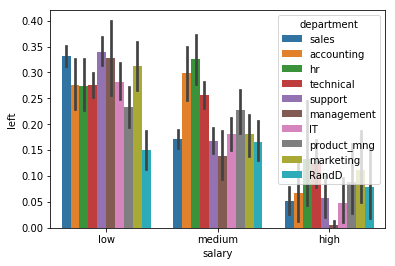

In [73]:
# 根据department向下钻取
sns.barplot(x='salary',y='left',hue='department',data=df)
plt.show()

## 相关分析与实现

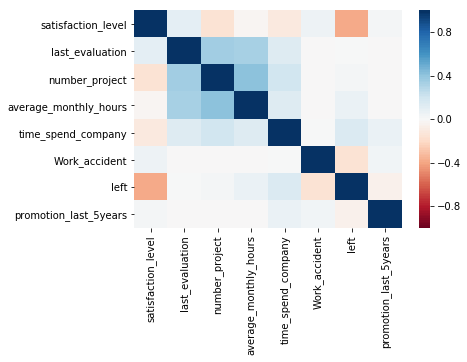

In [78]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))
plt.show()

离散属性（类别变量）之间的相关性计算用相关系数有失真。可以用熵来衡量。
<br />
<img src='./image/4.10.png' width=400 div align=left />  
<img src='./image/4.11.png' width=400 div align=left />
<img src='./image/4.12.png' width=400 div align=left />

In [79]:
s1=pd.Series(['X1','X1','X2','X2','X2','X2'])
s2=pd.Series(['Y1','Y1','Y1','Y2','Y2','Y2'])

In [122]:
s1.value_counts().values

array([4, 2], dtype=int64)

In [82]:
pd.groupby(s1,by=s1)

D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  if __name__ == '__main__':


In [80]:
pd.groupby(s1,by=s1).count()

D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  if __name__ == '__main__':


X1    2
X2    4
dtype: int64

In [81]:
pd.groupby(s1,by=s1).count().values

D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  if __name__ == '__main__':


array([2, 4], dtype=int64)

In [88]:
# 定义熵
def getEntropy(s):
    if not isinstance(s,pd.core.series.Series):
        s=pd.Series(s)
    prt_ary=pd.groupby(s,by=s).count().values/float(len(s))
    return -(np.log2(prt_ary)*prt_ary).sum()

In [86]:
print('s1 Entropy:',getEntropy(s1))
print('s2 Entropy:',getEntropy(s2))

s1 Entropy: 0.918295834054
s2 Entropy: 1.0


D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  app.launch_new_instance()


In [89]:
# 定义条件熵
def getCondEntropy(s1,s2):
    d=dict()
    for i in list(range(len(s1))):
        d[s1[i]]=d.get(s1[i],[])+[s2[i]]
    return sum([getEntropy(d[k])*len(d[k])/float(len(s1)) for k in d])

In [91]:
print('CondEntropy s2|s1:',getCondEntropy(s1,s2))
print('CondEntropy s1|s2:',getCondEntropy(s2,s1))

CondEntropy s2|s1: 0.540852082973
CondEntropy s1|s2: 0.459147917027


D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods


In [92]:
# 定义熵增益（互信息）
def getEntropyGain(s1,s2):
    return getEntropy(s2)-getCondEntropy(s1,s2)

In [93]:
print('EntropyGain',getEntropyGain(s1,s2))
print('EntropyGain',getEntropyGain(s2,s1))

EntropyGain 0.459147917027
EntropyGain 0.459147917027


D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods


In [94]:
# 定义熵增益率与相关性
def getEntropyGainRatio(s1,s2):
    return getEntropyGain(s1,s2)/getEntropy(s2)

In [95]:
print('EntropyGainRatio:',getEntropyGainRatio(s1,s2))
print('EntropyGainRatio:',getEntropyGainRatio(s2,s1))

EntropyGainRatio: 0.459147917027
EntropyGainRatio: 0.5


D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods


In [96]:
# 定义离散值的相关性
import math
def getDiscreteCorr(s1,s2):
    return getEntropyGain(s1,s2)/math.sqrt(getEntropy(s1)*getEntropy(s2))

In [97]:
print('DiscreteCorr:',getDiscreteCorr(s1,s2))
print('DiscreteCorr:',getDiscreteCorr(s2,s1))

DiscreteCorr: 0.479138767492
DiscreteCorr: 0.479138767492


D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods


In [102]:
# 定义Gini系数
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s=pd.Series(s)
    prt_ary=pd.groupby(s,by=s).count().values/float(len(s))
    return sum(prt_ary**2)
def getGini(s1,s2):
    d=dict()
    for i in list(range(len(s1))):
        d[s1[i]]=d.get(s1[i],[])+[s2[i]]
    return 1-sum([getProbSS(d[k])*len(d[k])/float(len(s1)) for k in d])

In [104]:
print('Gini:',getGini(s1,s2))
print('Gini:',getGini(s2,s1))

Gini: 0.25
Gini: 0.222222222222


D:\anaconda\64bit\envs\py3.6\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods


## 因子分析
<img src='./image/4.13.png' width=400 div align=left />

In [105]:
from sklearn.decomposition import PCA

In [116]:
df=df.dropna(axis=0,how='any')

In [118]:
my_pca=PCA(n_components=7)
lower_mat=my_pca.fit_transform(df.drop(labels=['salary','department','left'],axis=1))
print('Ratio:',my_pca.explained_variance_ratio_)

Ratio: [  9.98565340e-01   8.69246970e-04   4.73865973e-04   4.96932182e-05
   2.43172315e-05   9.29496619e-06   8.24128218e-06]


发现只有第一个值接近于1，其他都很接近于0，所以只用保留第一个即可。

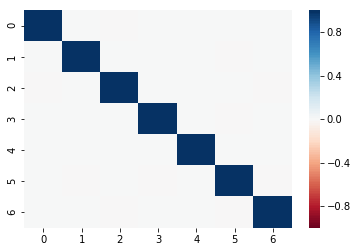

In [119]:
sns.heatmap(pd.DataFrame(lower_mat).corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))
plt.show()

发现，通过主成分分析后，只有对角线上相关系数几乎为1，其他几乎为0。  
主成分分析把原来的特征空间变成了正交的特征空间。

<img src='./image/4.14.png' width=400 div align=left />